In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders    #from the g-2 blinding software. 
                                    #Download link: https://cdcvs.fnal.gov/redmine/projects/gm2analyses/wiki/Library_installation
from BlindersPy3 import FitType

file = r.TFile("./gm2offline_ana_22530535_16119.00442.root")

tree = file.Get("farline/eventTree")

getBlinded = Blinders(FitType.Omega_a, 'memes')

Welcome to JupyROOT 6.18/04


In [4]:
"""
Define the blinded wiggle function used for fitting
"""

def blinded_wiggle(x, p):
    norm = p[0]
    life = p[1]
    asym = p[2]
    R = p[3]
    phi = p[4]
    
    time = x[0]
    omega = getBlinded.paramToFreq(R)
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

func = r.TF1("func", blinded_wiggle, 30, 600, 5)
func.SetParNames('N', '#tau', 'A', 'R( #omega_{a} )', '#phi')
func.SetParameters(250, 64.4, 0.4, 0, 5.2)
func.SetLineColor(3)
func.SetNpx(10000)

In [6]:
"""
Create a list of histograms of Energy vs Time for calorimeter 1
"""

hists = []
for i in range(1, 2):
    hist = r.TH2D("calo_"+str(i),
                  "Energy vs Time for Calorimeter "+str(i)+"; Time [#mus]; Energy [MeV]",
                  4700, 0, 700, 600, 0, 6000)
    
    tree.Draw("energy:time*1.25/1000.>>calo_"+str(i),"caloNum == "+str(i),"goff")
    hists.append(hist.Clone("calo_"+str(i)))

Warning in <TFile::Append>: Replacing existing TH1: calo_1 (Potential memory leak).


 FCN=325.653 FROM MIGRAD    STATUS=FAILED         82 CALLS          83 TOTAL
                     EDM=0.150324    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            1.59280e+02   2.28560e+19   0.00000e+00  -6.78158e-05
   2  #tau         1.72910e+08   0.00000e+00   0.00000e+00   7.26661e-13
   3  A            3.67084e-01   2.28560e+19  -0.00000e+00   1.04399e-02
   4  R( #omega_{a} )   3.91461e+03   2.28560e+19   0.00000e+00  -1.66104e-07
   5  #phi         4.98782e+00   2.28560e+19   0.00000e+00  -4.04041e-03
 FCN=325.652 FROM MINOS     STATUS=SUCCESSFUL    416 CALLS        1729 TOTAL
                     EDM=7.95655e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N           

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <Fit>: Abnormal termination of minimization.


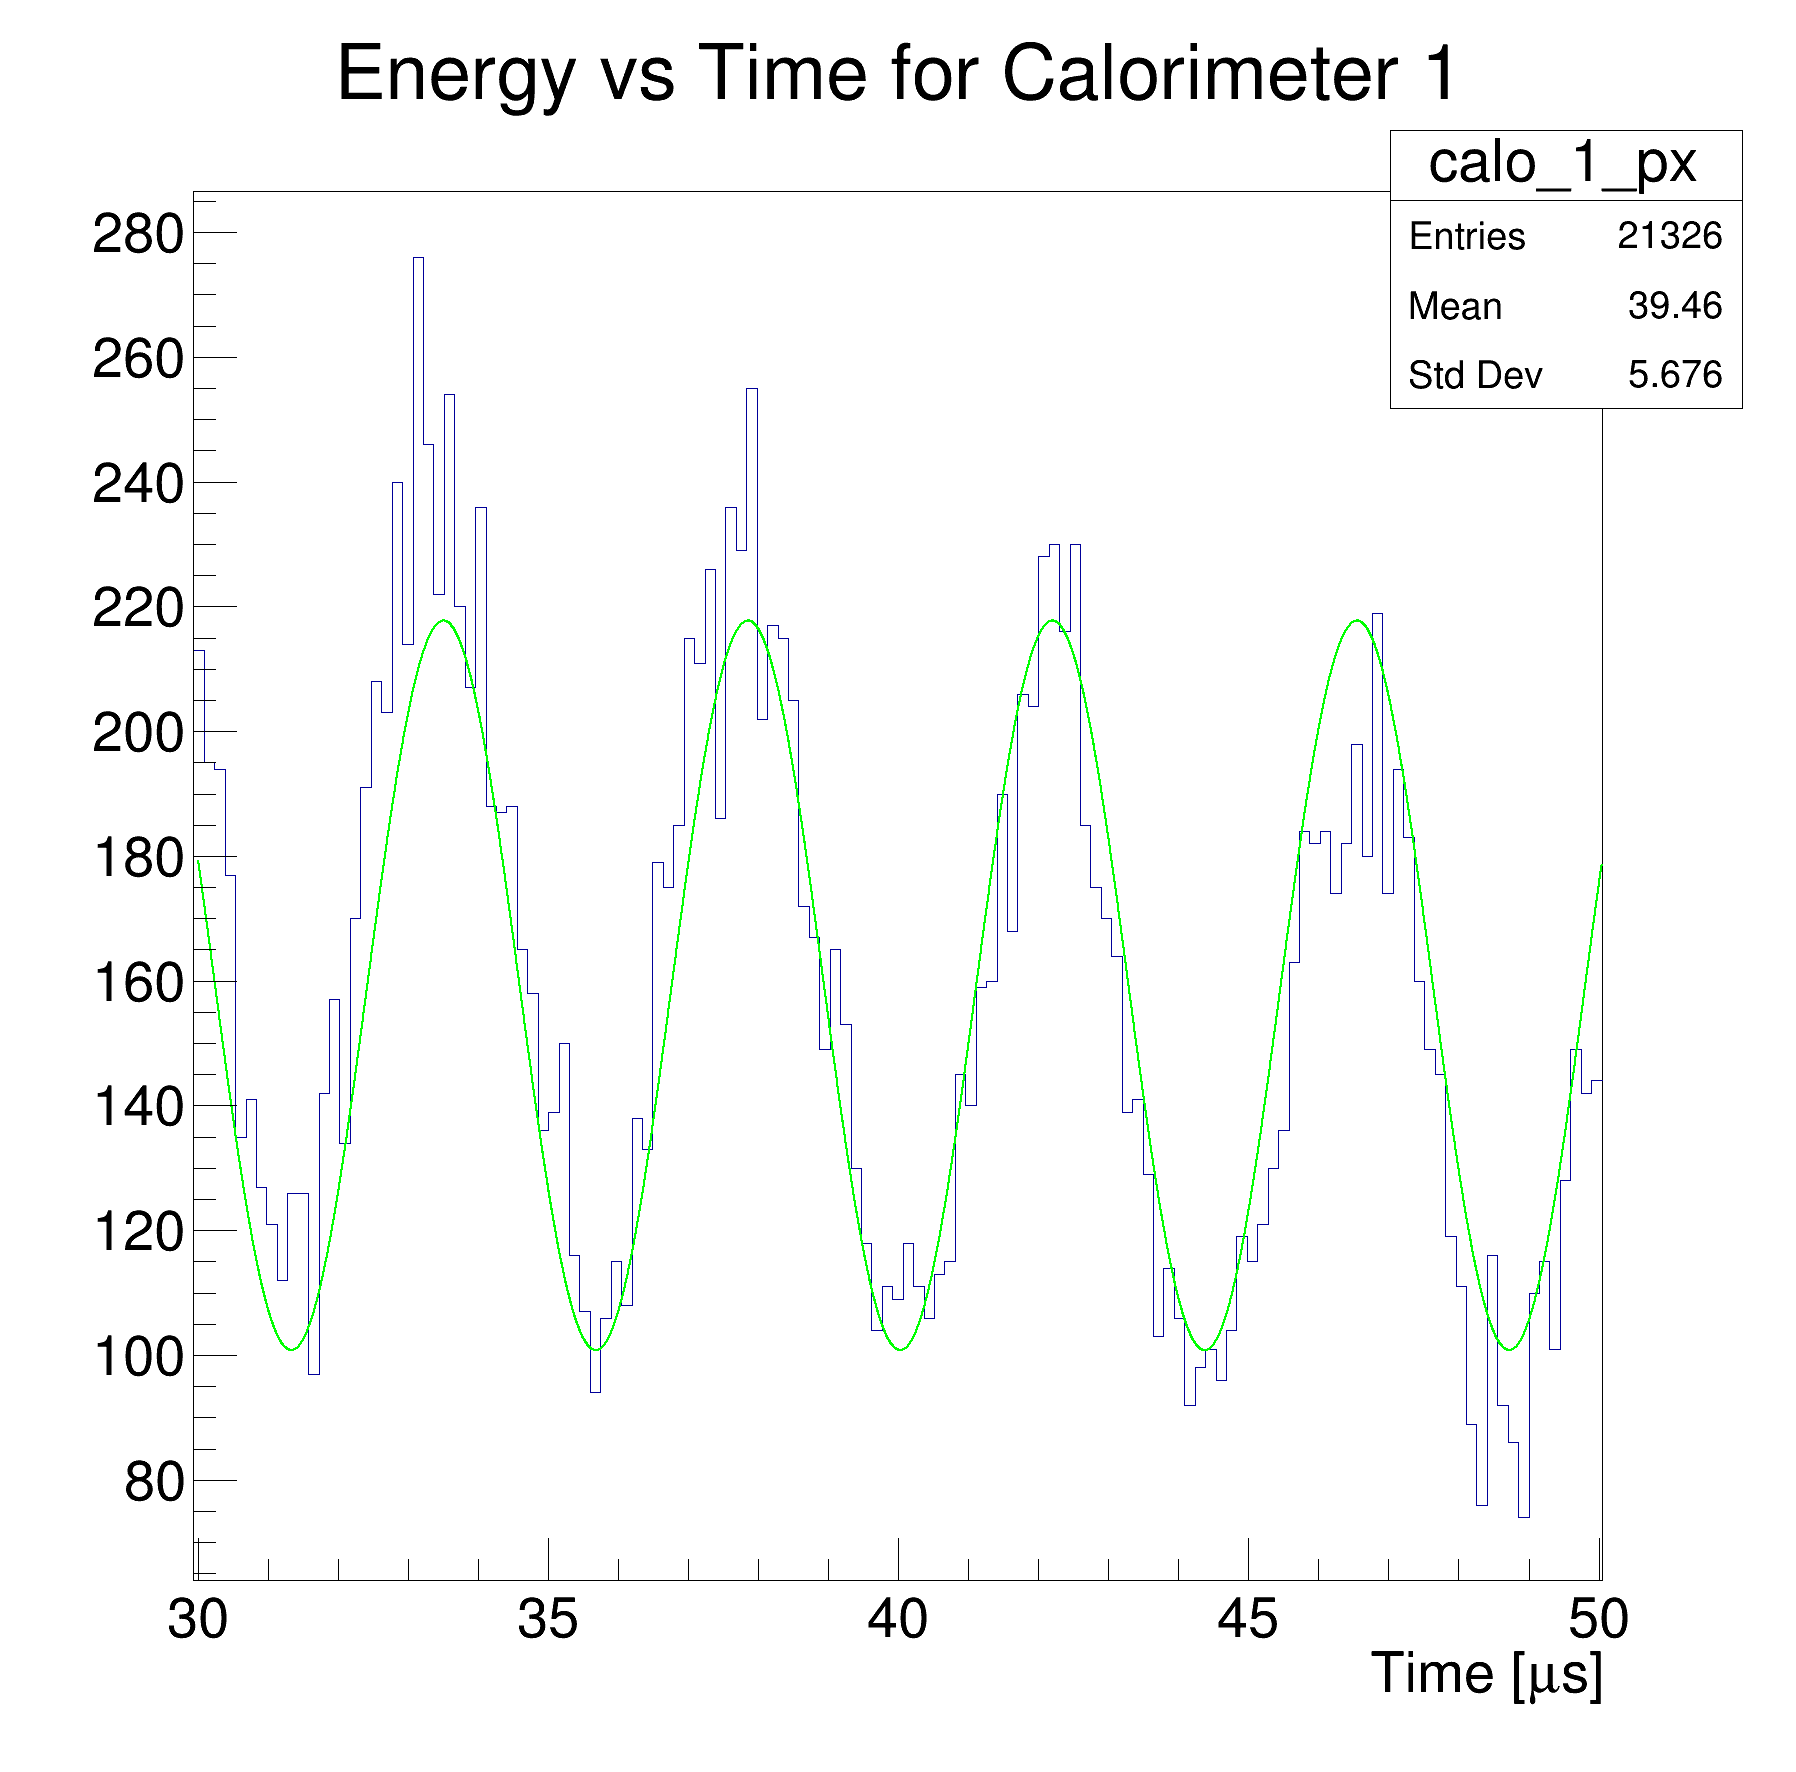

In [10]:
"""
Plot the energy vs time histograms for each calorimeter
"""

eLow = 1700
eHigh = 6000

c = r.TCanvas("c", "c", 1800, 1800)
c.Divide(1, 1)
    
for i, hist in enumerate(hists):
    c.cd(i+1)
    
    binLow = hist.GetYaxis().FindBin(eLow)
    binHigh = hist.GetYaxis().FindBin(eHigh)

    hist.GetXaxis().SetRangeUser(30,50)
    hist.ProjectionX("_px", binLow, binHigh).Draw("colz")
    hist.ProjectionX("_px", binLow, binHigh).Fit("func", "REM")
    memes = hist.ProjectionX("_px", binLow, binHigh).Fit("func", "REMS")
    
    r.gPad.SetLogz()
c.Draw()

In [19]:
print(memes)


****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =      325.652
NDf                       =          130
Edm                       =  7.95655e-09
NCalls                    =          343
N                         =       159.28   +/-   0.869853    
#tau                      =  1.15331e+08   +/-   1.41421     
A                         =     0.367084   +/-   0.00911532  
R( #omega_{a} )           =      3914.61   +/-   1.41421     
#phi                      =      4.98783   +/-   0.0253512   



In [25]:
memes.Parameter(100)

6.95333452623517e-310